In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.churn = (df.churn== 'yes').astype(int)

In [15]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [16]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_train_full, test_size = 0.33, random_state = 11)

In [18]:
y_train = df_train.churn.values
y_val =df_val.churn.values

In [23]:
df_train.drop(columns = ['churn'],  axis =1)
df_val.drop(columns = ['churn'],  axis =1)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5805,1697-nvvgy,male,1,yes,no,19,yes,no,dsl,yes,no,yes,no,yes,no,month-to-month,no,bank_transfer_(automatic),66.40,1286.05
3687,6849-oyamu,male,0,yes,yes,19,yes,no,fiber_optic,no,yes,no,yes,yes,yes,one_year,no,bank_transfer_(automatic),100.00,1888.65
6900,7921-lmdfq,male,1,no,no,51,yes,no,fiber_optic,no,no,yes,no,yes,yes,one_year,yes,bank_transfer_(automatic),94.00,4905.75
1644,3331-hqdtw,female,0,no,no,34,yes,yes,fiber_optic,yes,yes,yes,no,yes,yes,month-to-month,yes,mailed_check,109.80,3587.25
6975,1904-wajaa,female,0,yes,yes,24,yes,yes,dsl,yes,yes,yes,no,no,no,two_year,no,electronic_check,64.35,1558.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,2832-scuco,female,0,no,no,2,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,electronic_check,19.90,57.40
5203,0734-oxwbt,male,0,no,yes,3,yes,no,dsl,no,no,no,yes,yes,yes,month-to-month,no,mailed_check,70.70,225.65
1399,3131-nwvfj,female,0,yes,yes,14,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,mailed_check,19.55,294.50
302,8266-vbfql,male,0,no,no,4,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,yes,electronic_check,90.40,356.65


## EDA

In [26]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

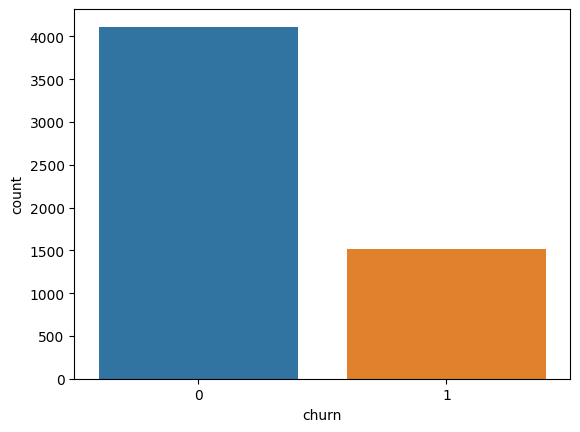

In [33]:
sns.countplot(data = df_train_full, x = 'churn')
plt.show()

In [29]:
global_mean = df_train_full.churn.mean()

In [30]:
round(global_mean, 3)

0.27

In [31]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [32]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

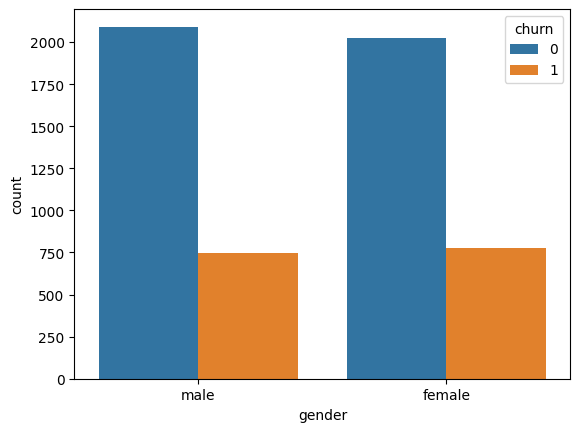

In [34]:
## Now lets see categorical wise and calculate the churn mean in each case
sns.countplot(x ='gender', hue = 'churn', data = df_train_full )
plt.show()

In [36]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


In [37]:
female_mean/ global_mean

1.0253955354648652

In [38]:
male_mean/global_mean

0.9749802969838747

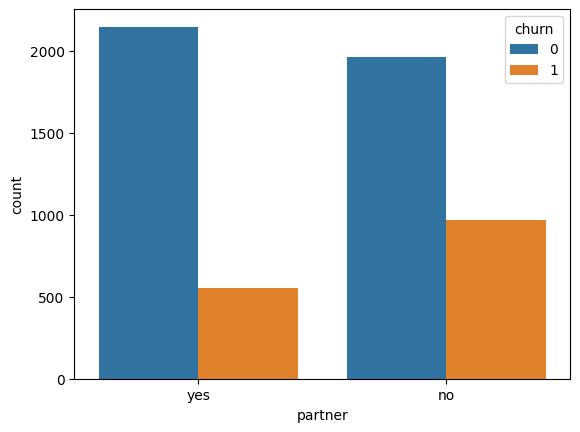

In [39]:
sns.countplot(x ='partner', hue = 'churn', data = df_train_full )
plt.show()

In [40]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [41]:
partner_yes/global_mean

0.7594724924338315

In [42]:
partner_no/global_mean

1.2216593879412643

In [43]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


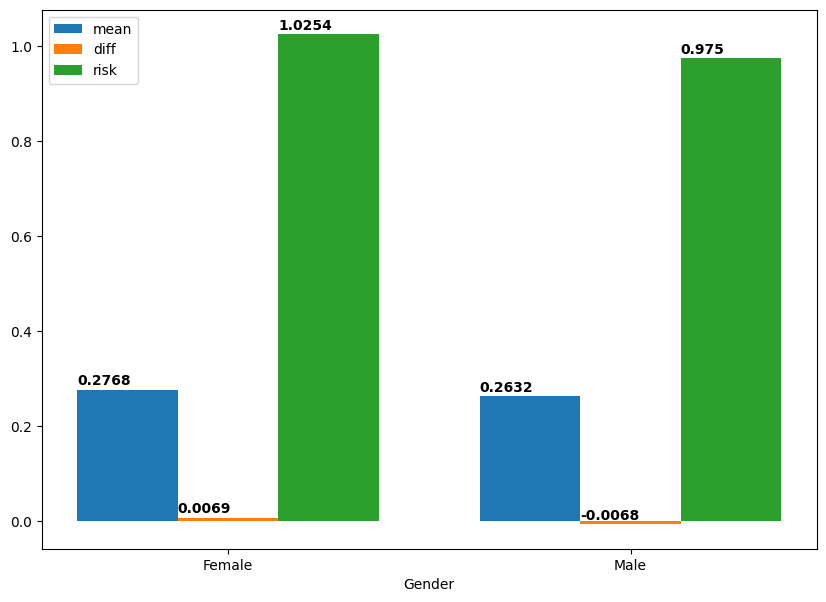

In [50]:
x_labels = ['Female', 'Male']
x = range(len(x_labels))
width = 0.25

fig, ax = plt.subplots(figsize = (10,7))
ax.bar(x, df_group['mean'], width, label='mean')
ax.bar([i + width for i in x], df_group['diff'], width, label='diff')
ax.bar([i + width*2 for i in x], df_group['risk'], width, label='risk')

ax.set_xticks([i + width for i in x])
ax.set_xticklabels(x_labels)
ax.set_xlabel('Gender')
ax.legend()

for i, v in enumerate(df_group['mean']):
    ax.text(i - width/2, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')
for i, v in enumerate(df_group['diff']):
    ax.text(i + width/2, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')
for i, v in enumerate(df_group['risk']):
    ax.text(i + width*1.5, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')
    
plt.show()

In [52]:
## lets not round off and see the difference and risk
global_mean = df_train_full.churn.mean()
global_mean

0.26996805111821087

In [ ]:
from Ipython.display import display

In [55]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [ ]:
for col in categorical:
    x_labels = ['Female', 'Male']
    x = range(len(x_labels))
    width = 0.25

    fig, ax = plt.subplots(figsize = (10,7))
    ax.bar(x, df_group['mean'], width, label='mean')
    ax.bar([i + width for i in x], df_group['diff'], width, label='diff')
    ax.bar([i + width*2 for i in x], df_group['risk'], width, label='risk')

    ax.set_xticks([i + width for i in x])
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Gender')
    ax.legend()

    for i, v in enumerate(df_group['mean']):
        ax.text(i - width/2, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')
    for i, v in enumerate(df_group['diff']):
        ax.text(i + width/2, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')
    for i, v in enumerate(df_group['risk']):
        ax.text(i + width*1.5, v + 0.01, str(round(v, 4)), color='black', fontweight='bold')

    plt.show()

In [56]:
 from sklearn.metrics import mutual_info_score

In [58]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='Mututal_Info')


display(df_mi.head())
display(df_mi.tail())

,Mututal_Info
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,Mututal_Info
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [59]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [60]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [61]:
from sklearn.feature_extraction import DictVectorizer

In [62]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [63]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [65]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [66]:
X_train = dv.transform(train_dict)
X_train.shape

(3774, 45)

In [68]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(solver = 'liblinear', random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [71]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [72]:
X_val = dv.transform(val_dict)

In [73]:
model.predict_proba(X_val)

array([[0.76508784, 0.23491216],
       [0.73113015, 0.26886985],
       [0.68054704, 0.31945296],
       ...,
       [0.94274614, 0.05725386],
       [0.38476895, 0.61523105],
       [0.93872763, 0.06127237]])

In [74]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.23491216, 0.26886985, 0.31945296, ..., 0.05725386, 0.61523105,
       0.06127237])

In [75]:
churn = y_pred > 0.5
(y_val == churn).mean()

0.8016129032258065

In [76]:

model.intercept_[0]

-0.12198896163042137

In [78]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [79]:

subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [80]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [81]:
model_small.intercept_[0]

-0.6387618613273348

In [82]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.91,
 'contract=one_year': -0.144,
 'contract=two_year': -1.404,
 'tenure': -0.097,
 'totalcharges': 0.001}

In [83]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [84]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [85]:
churn = y_pred_small > 0.5
(y_val == churn).mean()

0.7672043010752688

In [86]:
## Model Test

customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [87]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.07332111084949638

In [88]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [89]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321656556055403